# Advertising Data 분석
- Logistic Regression Modeling 예제

## STEP1. 모듈 및 Dataset 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./advertising.csv")

## STEP2. EDA 및 기초 통계 분석

In [3]:
data.shape

(1000, 10)

In [4]:
data.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       916 non-null    float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [7]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,916.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.128821,55000.000080,180.000100,0.481000,0.50000
std,15.853615,9.018548,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


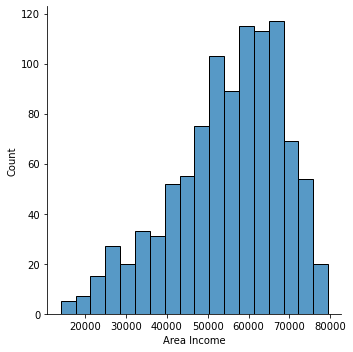

In [8]:
sns.displot(data=data['Area Income'])

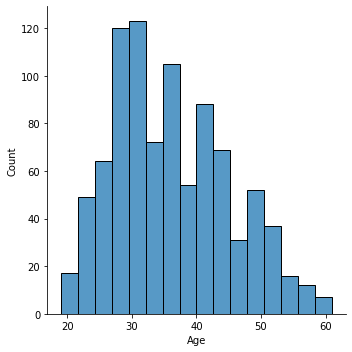

In [9]:
sns.displot(data=data['Age'])

### 2-1) 텍스트로 된 컬럼 확인

In [11]:
data['Country'].nunique()

237

In [12]:
data['City'].nunique()

969

In [13]:
data['Ad Topic Line'].nunique()

1000

### 2-4) Missing  Value 확인 & 처리

In [15]:
data.isna().sum() / len(data)

Daily Time Spent on Site    0.000
Age                         0.084
Area Income                 0.000
Daily Internet Usage        0.000
Ad Topic Line               0.000
City                        0.000
Male                        0.000
Country                     0.000
Timestamp                   0.000
Clicked on Ad               0.000
dtype: float64

In [16]:
data.dropna()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
5,59.99,23.0,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,5/19/2016 14:30,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1
996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1
997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1
998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0


In [17]:
data.drop('Age', axis=1)

,Daily Time Spent on Site,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...
995,72.97,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1
996,51.30,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1
997,51.63,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1
998,55.55,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0


In [20]:
round(data['Age'].mean())

36

In [21]:
data['Age'].median()

35.0

In [22]:
data = data.fillna(round(data['Age'].mean()))

In [23]:
data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

## STEP3. Train/Test DATA 분리

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [26]:
X = data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = data['Clicked on Ad']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

## STEP4. Logistic Regression Model 생성

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression()

In [30]:
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
model.coef_

array([[-6.38762346e-02,  2.72671198e-01, -1.69353437e-05,
        -2.45055858e-02,  1.88139746e-03]])

## STEP5. 예측 및 평가

In [32]:
pred = model.predict(X_test)

In [33]:
pred

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1], dtype=int64)

In [34]:
y_test

890    0
694    0
798    0
147    1
858    1
      ..
150    0
279    0
544    0
568    0
911    1
Name: Clicked on Ad, Length: 200, dtype: int64

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:
accuracy_score(y_test, pred)

0.905

In [37]:
confusion_matrix(y_test, pred)

array([[100,  11],
       [  8,  81]], dtype=int64)